In [328]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
import matplotlib.ticker as ticker
import json
from matplotlib.ticker import MaxNLocator

In [329]:

def read_data(name,method='bicubic'):
    if name != "era5":
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO2D_patch' ,'EDSR', 'WDSR', 'SwinIR']
    else:
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO2D' ,'EDSR', 'WDSR', 'SwinIR']
    metrics_list = ['RFNE','IN', 'PSNR', 'SSIM']
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    nskt16_rfne8, nskt16_rfne16 = [], []
    nskt16_IN8, nskt16_IN16 = [], []
    nskt16_psnr8, nskt16_psnr16 = [], []
    nskt16_ssim8, nskt16_ssim16 = [], []
    nskt16_params8, nskt16_params16 = [], []
    for model_name in models:
        for keys in data: 
            entry = data[keys]
            if keys == f"{model_name}_{name}_{method}_8_0.0":
                # print(keys)
                nskt16_rfne8.append(round(float(entry['metrics']['RFNE']['test2 error']), 2))
                nskt16_IN8.append(round(float(entry['metrics']['IN']['test2 error']), 2))
                nskt16_psnr8.append(round(float(entry['metrics']['PSNR']['test2 error']), 2))
                nskt16_ssim8.append(round(float(entry['metrics']['SSIM']['test2 error']), 2))
                nskt16_params8.append(entry['parameters'])
            elif keys == f"{model_name}_{name}_{method}_16_0.0":
                # print(keys)
                nskt16_rfne16.append(round(float(entry['metrics'].get('RFNE', {}).get('test2 error', None)), 2))
                nskt16_IN16.append(round(float(entry['metrics'].get('IN', {}).get('test2 error', None)), 2))
                nskt16_psnr16.append(round(float(entry['metrics'].get('PSNR', {}).get('test2 error', None)), 2))
                nskt16_ssim16.append(round(float(entry['metrics'].get('SSIM', {}).get('test2 error', None)), 2))
                nskt16_params16.append(entry['parameters'])

    print("RFNE 8: ", nskt16_rfne8)
    print("RFNE 16: ", nskt16_rfne16)
    print("IN 8: ", nskt16_IN8)
    print("IN 16: ", nskt16_IN16)
    print("PSNR 8: ", nskt16_psnr8)
    print("PSNR 16: ", nskt16_psnr16)
    print("SSIM 8: ", nskt16_ssim8)
    print("SSIM 16: ", nskt16_ssim16)
    print("Params 8: ", nskt16_params8)
    print("Params 16: ", nskt16_params16)
    return nskt16_rfne8, nskt16_rfne16, nskt16_IN8, nskt16_IN16, nskt16_psnr8, nskt16_psnr16, nskt16_ssim8, nskt16_ssim16, nskt16_params8, nskt16_params16

In [330]:

# print(json.dumps(data, indent=4))
#cosmo_sim_8_bicubic_8_0.0
def read_data_lr_sim(name,method='bicubic'):
    if name != "era5":
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO2D_patch' ,'EDSR', 'WDSR', 'SwinIR']
    else:
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO2D' ,'EDSR', 'WDSR', 'SwinIR']
    metrics_list = ['RFNE','IN', 'PSNR', 'SSIM']
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    nskt16_rfne8, nskt16_rfne16 = [], []
    nskt16_IN8, nskt16_IN16 = [], []
    nskt16_psnr8, nskt16_psnr16 = [], []
    nskt16_ssim8, nskt16_ssim16 = [], []
    nskt16_params8, nskt16_params16 = [], []
    for model_name in models:
        for keys in data: 
            entry = data[keys]
            if "nskt" in name and keys == f"{model_name}_{name}_bicubic_4_0.0":   
                # print(keys)
                nskt16_rfne8.append(round(float(entry['metrics']['RFNE']['test2 error']), 2))
                nskt16_IN8.append(round(float(entry['metrics']['IN']['test2 error']), 2))
                nskt16_psnr8.append(round(float(entry['metrics']['PSNR']['test2 error']), 2))
                nskt16_ssim8.append(round(float(entry['metrics']['SSIM']['test2 error']), 2))
                nskt16_params8.append(entry['parameters'])
            elif "cosmo" in name and keys == f"{model_name}_{name}_bicubic_8_0.0": 
                # print(keys)
                nskt16_rfne8.append(round(float(entry['metrics']['RFNE']['test2 error']), 2))
                nskt16_IN8.append(round(float(entry['metrics']['IN']['test2 error']), 2))
                nskt16_psnr8.append(round(float(entry['metrics']['PSNR']['test2 error']), 2))
                nskt16_ssim8.append(round(float(entry['metrics']['SSIM']['test2 error']), 2))
                nskt16_params8.append(entry['parameters'])
    print("RFNE 8: ", nskt16_rfne8)
    
    return nskt16_rfne8, nskt16_IN8, nskt16_psnr8,nskt16_ssim8,nskt16_params8

In [331]:
rfne8,rfne16,_,_,_,_,_,_,param8,param16 = read_data('nskt_16k')
rfne8,rfne16,param8,param16 = np.array(rfne8),np.array(rfne16),np.array(param8),np.array(param16)
print(param8)

RFNE 8:  [0.12, 0.12, 0.04, 0.06, 0.02, 0.03, 0.02]
RFNE 16:  [0.21, 0.23, 0.08, 0.14, 0.07, 0.07, 0.06]
IN 8:  [0.19, 0.23, 0.07, 0.16, 0.05, 0.08, 0.26]
IN 16:  [0.31, 0.36, 0.12, 0.26, 0.1, 0.15, 0.11]
PSNR 8:  [34.68, 33.62, 46.23, nan, 48.28, 53.53, 52.95]
PSNR 16:  [29.03, 28.5, 40.53, nan, 42.35, 43.01, 43.01]
SSIM 8:  [0.92, 0.92, 0.99, 0.94, 1.0, 0.99, 1.0]
SSIM 16:  [0.85, 0.85, 0.95, 0.81, 0.96, 0.95, 0.96]
Params 8:  [0.0, 0.069251, 0.341888, 4.752259, 1.665283, 1.404256, 12.047911]
Params 16:  [0.0, 0.069251, 0.67424, 4.752259, 1.812995, 1.615648, 12.195623]
[ 0.        0.069251  0.341888  4.752259  1.665283  1.404256 12.047911]


In [332]:
def plot_one_fig(name='nskt_16k',xshift=[0.0]*14,yshift=[0.0]*14):
    import mplcursors
    rfne8,rfne16,_,_,_,_,_,_,param8,param16 = read_data(name)
    rfne8,rfne16,param8,param16 = np.array(rfne8),np.array(rfne16),np.array(param8),np.array(param16)   
    if name == 'nskt_16k':
        big_name = 'NSKT (Re=16000)'
        ylim =[0, 26]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_static': (0.2, 0.3),
            "only_move":{"text": "xy", "static": "xy", "explode": "y", "pull": "x-"},
            "explode_radius":20,
        }
    elif name == 'nskt_32k':
        big_name = 'NSKT (Re=32000)'
        ylim =[0, 30]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_static': (0.2, 0.3),
            "only_move":{"text": "xy", "static": "xy", "explode": "y", "pull": "x-"},
            # 'force_pull': (0.1, 0.2),
            "explode_radius":20,
        }
    elif name == 'era5':
        big_name = 'Weather data'
        ylim =[7.5, 35]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_text': (0.1, 0.2),
            'force_static': (0.1, 0.2),
            'force_pull': (0.03, 0.03),
            'force_explode': (0.01*5, 0.02*5),
            'expand': (1.05, 1.1),
            "explode_radius":100,
        }
    elif name == 'cosmo':
        big_name = 'Cosmology data'
        ylim =[7.5, 80]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            "only_move":{"text": "xy", "static": "xy", "explode": "x", "pull": "x-"},
        }
        

    if name != "era5":
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO$^*$','EDSR', 'WDSR', 'SwinIR']
    else:
        models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO' ,'EDSR', 'WDSR', 'SwinIR']
    # ********** physics error **********
    fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

    font_size = 20
    label_size = 14

    red_color = '#C14443' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
    blue_color = '#0E4D8A'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

    a = fig.add_subplot(111)
    a.scatter(param8, 100*rfne8, label=r'Bicubic, $\times$8', marker='^', color=red_color)  
    a.scatter(param16, 100*rfne16, label=r'Bicubic, $\times$16', color=blue_color)   
    a.set_xlabel('Number of parameters [M]', fontsize=font_size)
    a.set_ylabel('RFNE [%]', fontsize=font_size)
    a.set_ylim(ylim[0], ylim[1])
    a.tick_params(axis='x', labelsize=label_size,)
    a.tick_params(axis='y', labelsize=label_size)
    a.set_title(big_name, fontsize=font_size)
    from matplotlib.ticker import MaxNLocator
    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    plt.legend(fontsize=label_size-1)
    from adjustText import adjust_text
    texts = []
    for i, txt in enumerate(models):
        if 100*rfne8[i] < ylim[1]:
            texts.append(a.annotate(txt, (param8[i], 100*rfne8[i]), color=red_color, fontsize=label_size))
    for i, txt in enumerate(models):
        if 100*rfne16[i] < ylim[1]:
            texts.append(a.annotate(txt, (param16[i], 100*rfne16[i]), color=blue_color, fontsize=label_size))
    adjust_text(texts, **adjust_text_settings)
    for i in range(14):
        texts[i].set_position((texts[i].get_position()[0]+xshift[i], texts[i].get_position()[1]+yshift[i]))
    plt.savefig(f'./bicubic_RFNE_{name}.pdf',bbox_inches='tight',transparent=True)
    plt.savefig(f'./bicubic_RFNE_{name}.png',bbox_inches='tight',transparent=True,dpi=300)
    # return 0

RFNE 8:  [0.12, 0.12, 0.04, 0.06, 0.02, 0.03, 0.02]
RFNE 16:  [0.21, 0.23, 0.08, 0.14, 0.07, 0.07, 0.06]
IN 8:  [0.19, 0.23, 0.07, 0.16, 0.05, 0.08, 0.26]
IN 16:  [0.31, 0.36, 0.12, 0.26, 0.1, 0.15, 0.11]
PSNR 8:  [34.68, 33.62, 46.23, nan, 48.28, 53.53, 52.95]
PSNR 16:  [29.03, 28.5, 40.53, nan, 42.35, 43.01, 43.01]
SSIM 8:  [0.92, 0.92, 0.99, 0.94, 1.0, 0.99, 1.0]
SSIM 16:  [0.85, 0.85, 0.95, 0.81, 0.96, 0.95, 0.96]
Params 8:  [0.0, 0.069251, 0.341888, 4.752259, 1.665283, 1.404256, 12.047911]
Params 16:  [0.0, 0.069251, 0.67424, 4.752259, 1.812995, 1.615648, 12.195623]


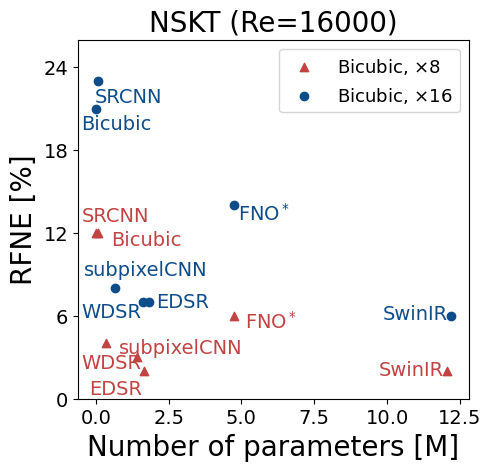

In [333]:
#['Bicubic', 'SRCNN', 'subpixelCNN','FNO' ,'EDSR', 'WDSR', 'SwinIR']
xshift_red=[1,0,1.2,-0.7,0,0,0]
yshift_red=[0,-0.3,-1.0,0.2,0,0,0]
xshift_blue=[0,-1.5,0,2,-1.0,0,0]
yshift_blue=[-0.6,-0.6,0,0,0,-0.8,0]
xshift = xshift_red + xshift_blue
yshift = yshift_red + yshift_blue
plot_one_fig('nskt_16k',xshift,yshift)


RFNE 8:  [0.14, 0.12, 0.06, 0.08, 0.04, 0.05, 0.04]
RFNE 16:  [0.23, 0.21, 0.15, 0.16, 0.09, 0.1, 0.08]
IN 8:  [0.22, 0.22, 0.1, 0.18, 0.07, 0.11, 0.5]
IN 16:  [0.33, 0.34, 0.22, 0.28, 0.13, 0.18, 0.13]
PSNR 8:  [33.84, 34.06, 43.43, nan, 46.21, 49.64, 47.52]
PSNR 16:  [28.5, 28.61, 33.42, nan, 40.67, 40.94, 42.2]
SSIM 8:  [0.9, 0.92, 0.97, 0.92, 0.99, 0.98, 0.99]
SSIM 16:  [0.82, 0.84, 0.88, 0.77, 0.94, 0.92, 0.94]
Params 8:  [0.0, 0.069251, 0.341888, 4.752259, 1.665283, 1.404256, 12.047911]
Params 16:  [0.0, 0.069251, 0.67424, 4.752259, 1.812995, 1.615648, 12.195623]


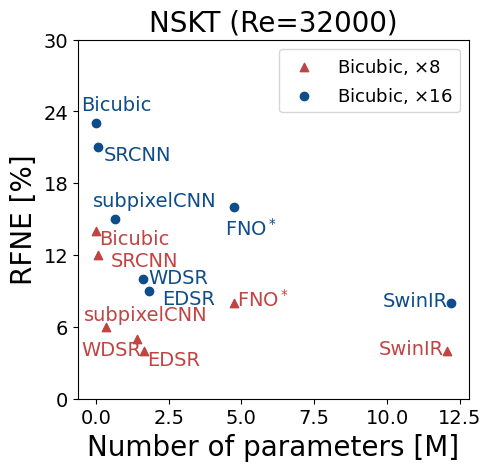

In [334]:
#['Bicubic', 'SRCNN', 'subpixelCNN','FNO' ,'EDSR', 'WDSR', 'SwinIR']
xshift_red = [0.6,-2.3,0,-1,2,0,0]
yshift_red = [-0.2,0,0,-1.5,1.3,0,0]
xshift_blue = [0,-1.2,0.3,1.2,1.4,2.3,0]
yshift_blue = [0,0,-1.1,0,-0.4,-1.2,0]
xshift = xshift_red + xshift_blue
yshift = yshift_red + yshift_blue
plot_one_fig('nskt_32k',xshift,yshift)

RFNE 8:  [0.18, 0.16, 0.12, 0.19, 0.12, 0.13, 0.11]
RFNE 16:  [0.28, 0.25, 0.19, 0.32, 0.19, 0.21, 0.18]
IN 8:  [0.64, 0.61, 0.49, 0.61, 0.55, 0.59, 0.48]
IN 16:  [0.71, 0.63, 0.55, 0.67, 0.59, 0.65, 0.55]
PSNR 8:  [26.52, 27.35, 30.33, 25.37, 30.35, 29.68, 31.28]
PSNR 16:  [22.37, 23.26, 25.92, 20.79, 26.01, 25.05, 26.43]
SSIM 8:  [0.83, 0.84, 0.89, 0.81, 0.89, 0.89, 0.9]
SSIM 16:  [0.74, 0.75, 0.81, 0.69, 0.81, 0.8, 0.82]
Params 8:  [0.0, 0.069251, 0.341888, 4.752259, 1.665283, 1.404256, 12.047911]
Params 16:  [0.0, 0.069251, 0.67424, 4.752259, 1.812995, 1.615648, 12.195623]


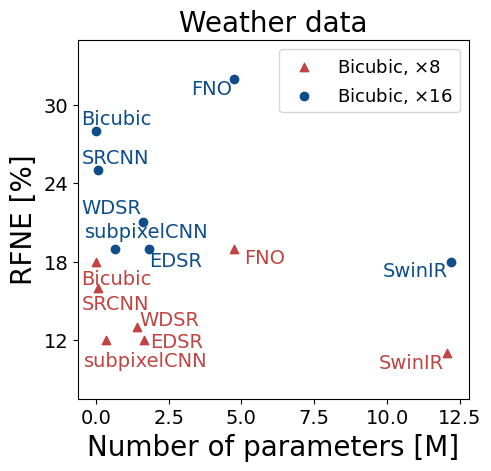

In [348]:
#['Bicubic', 'SRCNN', 'subpixelCNN','FNO' ,'EDSR', 'WDSR', 'SwinIR']
xshift_red = [0,0,0,1.8,1.1,2,0]
yshift_red = [-0.2,-0.4,-0.5,0,1,0.5,0]
xshift_blue = [0,0,0.0,0,1,0,0]
yshift_blue = [0,0,-0.5,0,-0.5,0,0]
xshift = xshift_red + xshift_blue
yshift = yshift_red + yshift_blue
plot_one_fig('era5',xshift,yshift)


RFNE 8:  [0.36, 0.36, 0.16, 0.15, 0.15, 0.16, 0.14]
RFNE 16:  [0.59, 0.6, 0.39, 0.41, 0.38, 0.4, 0.38]
IN 8:  [0.65, 8.24, 5.47, 0.34, 5.3, 5.45, 5.34]
IN 16:  [8.54, 9.63, 7.4, 0.58, 7.32, 7.46, 7.28]
PSNR 8:  [30.21, 30.09, 37.31, 28.95, 37.85, 37.51, 38.11]
PSNR 16:  [25.93, 25.78, 29.38, 20.04, 29.58, 29.34, 29.65]
SSIM 8:  [0.77, 0.78, 0.95, 0.89, 0.95, 0.95, 0.95]
SSIM 16:  [0.55, 0.56, 0.71, 0.55, 0.71, 0.7, 0.72]
Params 8:  [0.0, 0.063266, 0.30176, 4.75213, 1.66413, 1.37728, 12.045714]
Params 16:  [0.0, 0.063266, 0.523328, 4.75213, 1.811842, 1.508608, 12.193426]


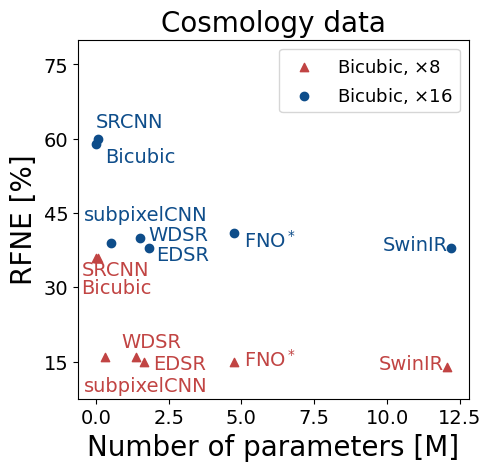

In [336]:
#['Bicubic', 'SRCNN', 'subpixelCNN','FNO' ,'EDSR', 'WDSR', 'SwinIR']
xshift_red = [0,0,0,-0.6,2.2,0.5,0]
yshift_red = [-0.3,-2,-14,2,4,0,0]
xshift_blue = [0.8,0.5,0,-0.6,-0.7,2.3,0]
yshift_blue = [-1.2,-0.2,-0.2,0,0,-10,0]
xshift = xshift_red + xshift_blue
yshift = yshift_red + yshift_blue
plot_one_fig('cosmo',xshift,yshift)


In [337]:

def plot_one_fig_sim(name='nskt_16k',xshift=[0.0]*7,yshift=[0.0]*7):
    
    rfne8,_,_,_,param8 = read_data_lr_sim(name)
    rfne8,param8 = np.array(rfne8),np.array(param8)
    if name == 'nskt_16k_sim_4_v8':
        big_name = 'NSKT (Re=16000)'
        ylim =[22, 32]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_static': (0.2, 0.3),
            "only_move":{"text": "xy", "static": "xy", "explode": "y", "pull": "x-"},
            "explode_radius":100,
        }
        label_text = r'LRSIM, $\times$4'
    elif name == 'nskt_32k_sim_4_v8':
        big_name = 'NSKT (Re=32000)'
        ylim =[25, 35]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_static': (0.2, 0.3),
            "only_move":{"text": "x+y", "static": "xy", "explode": "y", "pull": "x"},
            # 'force_pull': (0.1, 0.2),
            "explode_radius":200,
        }
        label_text = r'LRSIM, $\times$4'
    elif name == 'cosmo_sim_8':
        big_name = 'Cosmology data'
        ylim =[60, 73]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            # 'force_text': (0.1*9, 0.2*9),
            # 'force_static': (0.1, 0.2),
            # 'force_pull': (0.01, 0.01),
            # 'force_explode': (0.01*10, 0.02*10),
            "only_move":{"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
            'expand': (1.15, 1.1),
            "explode_radius":100,
        }
        label_text = r'LRSIM, $\times$8'
    models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO$^*$','EDSR', 'WDSR', 'SwinIR']
    # ********** physics error **********
    fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

    font_size = 20
    label_size = 14

    red_color = '#C14443' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
    blue_color = '#0E4D8A'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

    a = fig.add_subplot(111)
    a.scatter(param8, 100*rfne8, label=label_text, marker='^', color=red_color)    
    a.set_xlabel('Number of parameters [M]', fontsize=font_size)
    a.set_ylabel('RFNE [%]', fontsize=font_size)
    a.set_ylim(ylim[0], ylim[1])
    a.set_xlim(None,12.5)
    a.tick_params(axis='x', labelsize=label_size,)
    a.tick_params(axis='y', labelsize=label_size)
    a.set_title(big_name, fontsize=font_size)

    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    plt.legend(fontsize=label_size-1)
    from adjustText import adjust_text
    texts = []
    for i, txt in enumerate(models):
        if 100*rfne8[i] < ylim[1]:
            texts.append(a.annotate(txt, (param8[i], 100*rfne8[i]), color=red_color, fontsize=label_size))
    adjust_text(texts,**adjust_text_settings
                )   
    for i in range(len(texts)):
        texts[i].set_position((texts[i].get_position()[0]+xshift[i], texts[i].get_position()[1]+yshift[i]))
    plt.savefig(f'./LRSIM_RFNE_{name}.pdf',bbox_inches='tight',transparent=True)
    plt.savefig(f'./LRSIM_RFNE_{name}.png',bbox_inches='tight',transparent=True,dpi=300)
    return 0

RFNE 8:  [0.31, 0.26, 0.25, 0.29, 0.24, 0.24, 0.24]


0

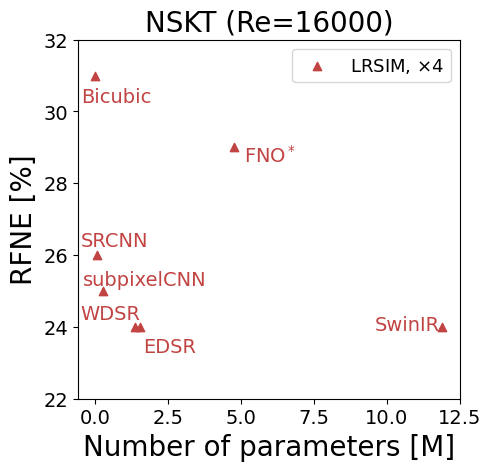

In [338]:
shiftx = [0,0,0,-0.7,2,0,0]
shifty = [-0.4,-0.1,-0.2,0,0,0.2,0]
plot_one_fig_sim('nskt_16k_sim_4_v8',shiftx,shifty)


RFNE 8:  [0.34, 0.28, 0.27, 0.32, 0.27, 0.27, 0.27]


0

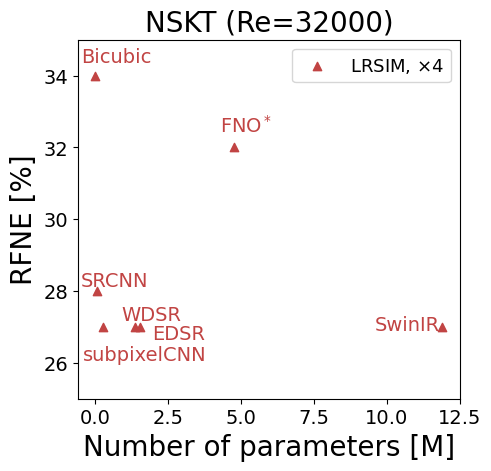

In [339]:
shiftx = [0,0,0,-1.5 ,2.3,1.4,0]
shifty = [0,0.5,0,0,1.4,0.4,0]
plot_one_fig_sim('nskt_32k_sim_4_v8',shiftx,shifty)


RFNE 8:  [1.01, 0.69, 0.66, 0.62, 0.67, 0.66, 0.66]


0

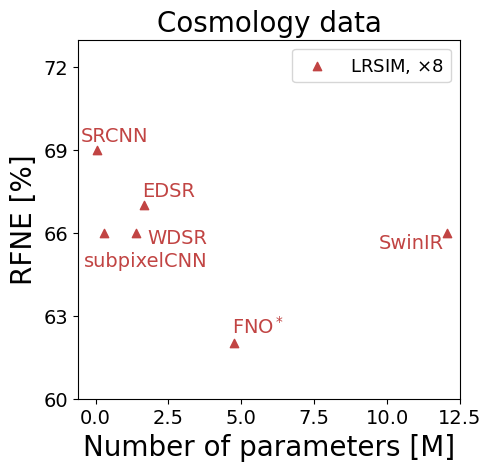

In [340]:
shiftx = [0,0,-1,-1,-0.5,0]
shifty = [0,0,0,0,0,0]
plot_one_fig_sim('cosmo_sim_8',shiftx,shifty)

In [341]:
data_list = ['NSKT (16k)', 'NSKT (32k)', 'Weather', 'Cosmology']
data_name = ['nskt_16k', 'nskt_32k', 'era5', 'cosmo']
bicubic_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_bicubic_8_0.0"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    bicubic_rfne.append(err)
    print(f"{name}: {err}")
noisy5_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_noisy_uniform_8_0.05"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    noisy5_rfne.append(err)
    print(f"{name}: {err}")
noisy10_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_noisy_uniform_8_0.1"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    noisy10_rfne.append(err)
    print(f"{name}: {err}")


nskt_16k: 0.017771467566490173
nskt_32k: 0.0379018560051918
era5: 0.10798198729753494
cosmo: 0.14454467594623566
nskt_16k: 0.02946927770972252
nskt_32k: 0.04591021314263344
era5: 0.11896038800477982
cosmo: 0.19310741126537323
nskt_16k: 0.04425628110766411
nskt_32k: 0.060444075614213943
era5: 0.12846384942531586
cosmo: 0.20518730580806732


In [342]:

# print(json.dumps(data, indent=4))

def read_phy_data(name,method='bicubic'):
    models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO2D_patch' ,'EDSR', 'WDSR', 'SwinIR']
    metrics_list = ['Physics']
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    physics8, physics16 = [], []
    for model_name in models:
        for keys in data: 
            entry = data[keys]
            if keys == f"{model_name}_{name}_{method}_8_0.0":
                # print(keys)
                physics8.append(round(float(entry['metrics']['Physics']['test2 error']), 2))
            elif keys == f"{model_name}_{name}_{method}_16_0.0":
                # print(keys)
                physics16.append(round(float(entry['metrics'].get('Physics', {}).get('test2 error', None)), 2))

    print("Physics 8: ", physics8)
    print("Physics 16: ", physics16)
    return physics8,physics16

In [343]:

def plot_one_fig_phy(name='nskt_16k',xshift=[0.0]*14,yshift=[0.0]*15):
    rfne8,rfne16,_,_,_,_,_,_,param8,param16 = read_data(name)
    physics8,physics16 = read_phy_data('nskt_16k')
    physics8,physics16 = np.array(physics8),np.array(physics16)
    if name == 'nskt_16k':
        big_name = 'NSKT (Re=16000)'
        ylim =[0, 2000]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_text': (0.1*2, 0.2*2),
            # 'force_static': (0.1, 0.2),
            # 'force_pull': (0.01, 0.01),
            'force_explode': (0.01*5, 0.02*5),
            "only_move":{"text": "xy", "static": "xy", "explode": "y", "pull": "xy"},
            'expand': (1.15, 1.1),
            "explode_radius":100,
        }
    elif name == 'nskt_32k':
        big_name = 'NSKT (Re=32000)'
        ylim =[0, 2000]
        adjust_text_settings = {
            "expand": (1.15, 1.35),
            'force_text': (0.1*2, 0.2*2),
            # 'force_static': (0.1, 0.2),
            # 'force_pull': (0.01, 0.01),
            'force_explode': (0.01*5, 0.02*5),
            "only_move":{"text": "xy", "static": "xy", "explode": "y", "pull": "xy"},
            'expand': (1.15, 1.1),
            "explode_radius":100,
        }
    models = ['Bicubic', 'SRCNN', 'subpixelCNN','FNO$^*$','EDSR', 'WDSR', 'SwinIR']
    # ********** physics error **********
    fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))

    font_size = 20
    label_size = 14

    red_color = '#C14443' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
    blue_color = '#0E4D8A'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

    a = fig.add_subplot(111)
    a.scatter(param8, physics8, label=r'Bicubic, $\times$8', marker='^', color=red_color)  
    a.scatter(param16, physics16, label=r'Bicubic, $\times$16', color=blue_color)   
    a.set_xlabel('Number of parameters [M]', fontsize=font_size)
    a.set_ylabel('Physics Error', fontsize=font_size)
    a.set_yscale('log')
    a.tick_params(axis='x', labelsize=label_size)
    a.tick_params(axis='y', labelsize=label_size)
    a.set_title(big_name, fontsize=font_size+2)
    # a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    plt.legend(fontsize=label_size-1)
    from adjustText import adjust_text
    texts = []
    for i, txt in enumerate(models):
        texts.append(a.annotate(txt, (param8[i], physics8[i]), color=red_color, fontsize=label_size))
    for i, txt in enumerate(models):
        texts.append(a.annotate(txt, (param16[i], physics16[i]), color=blue_color, fontsize=label_size))
    adjust_text(texts,**adjust_text_settings
                )   
    for i in range(len(texts)):
        texts[i].set_position((texts[i].get_position()[0]+xshift[i], texts[i].get_position()[1]+yshift[i]))
    plt.savefig(f'./physics_{name}.pdf',bbox_inches='tight',transparent=True)
    plt.savefig(f'./physics_{name}.png',bbox_inches='tight',transparent=True,dpi=300)
    return 0

RFNE 8:  [0.14, 0.12, 0.06, 0.08, 0.04, 0.05, 0.04]
RFNE 16:  [0.23, 0.21, 0.15, 0.16, 0.09, 0.1, 0.08]
IN 8:  [0.22, 0.22, 0.1, 0.18, 0.07, 0.11, 0.5]
IN 16:  [0.33, 0.34, 0.22, 0.28, 0.13, 0.18, 0.13]
PSNR 8:  [33.84, 34.06, 43.43, nan, 46.21, 49.64, 47.52]
PSNR 16:  [28.5, 28.61, 33.42, nan, 40.67, 40.94, 42.2]
SSIM 8:  [0.9, 0.92, 0.97, 0.92, 0.99, 0.98, 0.99]
SSIM 16:  [0.82, 0.84, 0.88, 0.77, 0.94, 0.92, 0.94]
Params 8:  [0.0, 0.069251, 0.341888, 4.752259, 1.665283, 1.404256, 12.047911]
Params 16:  [0.0, 0.069251, 0.67424, 4.752259, 1.812995, 1.615648, 12.195623]
Physics 8:  [0.88, 4.16, 0.61, 11.7, 0.16, 0.54, 0.07]
Physics 16:  [0.79, 3.04, 0.64, 35.18, 0.44, 1.66, 0.43]


0

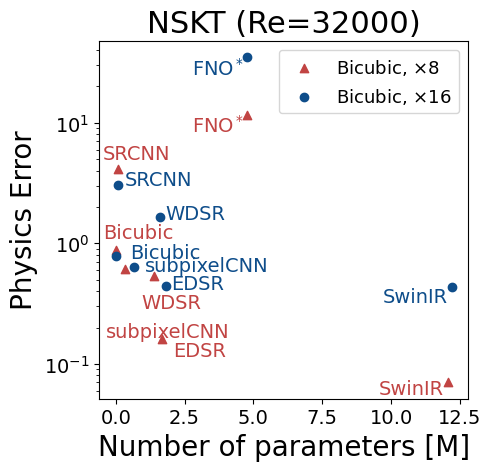

In [344]:
xshift_red=[0,0,0,0,2.3,0,0]
yshift_red=[0.05,0,-0.22,0,0.03,0.05,0]
xshift_blue=[1,0.8,-2,0,2.5,2.3,0]
yshift_blue=[0.12,0.5,-0.2,0,0.3,0,0]
xshift = xshift_red + xshift_blue
yshift = yshift_red + yshift_blue
plot_one_fig_phy('nskt_32k',xshift,yshift)

nskt_16k: 0.017771467566490173
nskt_32k: 0.0379018560051918
era5: 0.10798198729753494
cosmo: 0.14454467594623566
nskt_16k: 0.02946927770972252
nskt_32k: 0.04591021314263344
era5: 0.11896038800477982
cosmo: 0.19310741126537323
nskt_16k: 0.04425628110766411
nskt_32k: 0.060444075614213943
era5: 0.12846384942531586
cosmo: 0.20518730580806732


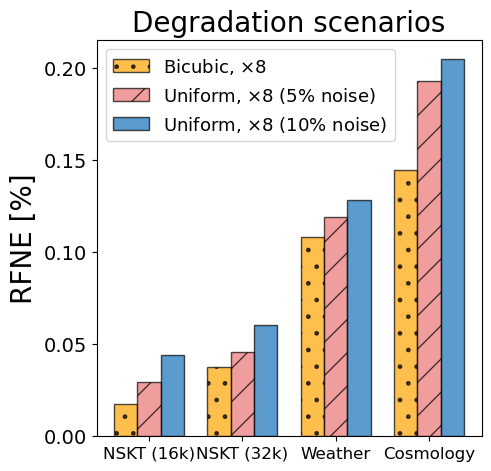

In [345]:
data_list = ['NSKT (16k)', 'NSKT (32k)', 'Weather', 'Cosmology']
data_name = ['nskt_16k', 'nskt_32k', 'era5', 'cosmo']
bicubic_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_bicubic_8_0.0"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    bicubic_rfne.append(err)
    print(f"{name}: {err}")
noisy5_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_noisy_uniform_8_0.05"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    noisy5_rfne.append(err)
    print(f"{name}: {err}")
noisy10_rfne = []
for name in data_name:
    keys = f"SwinIR_{name}_noisy_uniform_8_0.1"
    with open('normed_eval.json', 'r') as f: # parsed_data, normed_eval
        data = json.load(f)
    err = data[keys]["metrics"]["RFNE"]["test2 error"]
    noisy10_rfne.append(err)
    print(f"{name}: {err}")

font_size = 20
label_size = 14

red_color = '#EB7574' # '#E7524C' #'#DD2624' # '#CC8992' #'#C75A79' #'#DE2D26'
blue_color = '#1571B8'  # '#2191A8' # '#206FB0' #'#71A590' #'#458891' #'#3182BD'

# setup the x-axis
x = np.arange(len(data_list))

fig = plt.figure(layout='constrained', figsize = (4.8, 4.6))
ax = fig.add_subplot(111)

bar_width = 0.25
rects0 = ax.bar(x - bar_width, bicubic_rfne, bar_width, label=r'Bicubic, $\times$8', color='orange', alpha=0.7, edgecolor='black', hatch='.')
rects1 = ax.bar(x , noisy5_rfne, bar_width, label=r'Uniform, $\times$8 (5% noise)', color=red_color, alpha=0.7, edgecolor='black', hatch='/')
rects2 = ax.bar(x + bar_width, noisy10_rfne, bar_width, label=r'Uniform, $\times$8 (10% noise)', color=blue_color, alpha=0.7, edgecolor='black')

# rects1 = ax.bar(x - width/2, noisy5_rfne, width, label='5% Noise', color=red_color, alpha=0.7, edgecolor='black', hatch='/')
# rects2 = ax.bar(x + width/2, noisy10_rfne, width, label='10% Noise', color=blue_color, alpha=0.7, edgecolor='black')

# 添加标签、标题和图例
#ax.set_xlabel('Datasets', fontsize=font_size)
ax.set_ylabel('RFNE [%]', fontsize=font_size)
ax.set_title('Degradation scenarios', fontsize=font_size)
ax.set_xticks(x)
ax.set_xticklabels(data_list)
ax.tick_params(axis='x', labelsize=label_size-2)
ax.tick_params(axis='y', labelsize=label_size)
ax.legend(fontsize=label_size-1)
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
# plt.show()

plt.savefig('./degradation.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./degradation.png', dpi=300)